# RNN


Recurrent Neural Network

## RNN의 등장

NN, CNN으로는 연속된 데이터는 학습하기 어렵다.

자연어가 그 중 하나.

그래서 이전의 결과가 다음에 영향을 미치게 만들어진 모델을 RNN이라고 한다.

현재의 state가 다시 입력이 됨.

$$
h_t = f_w(h_{t-1}, x_t)
$$

$h_t$: 새 상태

$h_{t-1}$: 이전 상태

$x_t$: 연속적인 입력 중 하나

여기서 $f_w$는 모든 RNN에 대해서 동일하다. (같은 weight)

## Vanilla RNN
activation function 중 하나인 `tanh`사용
$$
h_t = tanh(W_{hh}h_{t-1} + W_{xh}x_t) \\
y_t = W_{hy}h_t
$$

## 예시

character-level language model

training sequence: `hello`
=> vocabularry = {'h', 'e', 'l', 'o'}

X = ['h', 'e', 'l', 'l', 'o']

h다음의 단어를 예상하는 모델이라고 생각하면 됨
```
X_0: h, Y_0: e
X_1: e, Y_1: l
X_2: l, Y_2: l
X_3: l, Y_3: o
```

우선 각각의 입력을 벡터로 변환

* one-hot encoding

1. X_0 에 H_xh 를 곱해서 hidden layer(h_0)를 만듦
2. X_1 에 H_xh 를 곱하고 앞서 나온 hidden layer(h_0)에 H_hh를 곱한 두개를 더해 새로운 hidden layer(h_1)를 만듦
3. X_t 에 H_xh를 곱하고 앞서 나온 hidden layer(h_t-1)에 H_hh를 곱한 두개를 더해 새로운 hidden layer(h_t)를 만듦
4. h_t에서 H_hy를 곱해 y_t을 구함

## 사용 용도
-- 연속적인 애들

* 언어 모델
* 음성 인식
* 번역
* 대화 모델, 질답 모델
* 이미지, 비디오 캡션

## 다양한 RNN

* one to one (Vanilla RNN)
* one to many (Image Captioning)
* many to one (정서 예측)
* many to many(어긋남) (번역)
* many to many(바로바로) (비디오, 각각 프레임)

(hidden) layer를 여러개 쌓을 수 있음

## 학습에서의 Challenging

LSTM

# RNN basics


## RNN 구현 방법

In [1]:
import tensorflow as tf
from tensorflow import keras

```py
cell = keras.layers.SimpleRNNCell(units=hidden_size)
rnn = keras.layers.RNN(cell, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

# or

rnn = keras.layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)
```

RNN input (Xdata): (batch, sequence, input_dim)

output: (batch, sequence, hidden_size)

In [2]:
import numpy as np

h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

In [3]:
x_data = np.array([[h]], dtype=np.float32)

hidden_size = 2
rnn = keras.layers.SimpleRNN(hidden_size,
                             return_sequences=True,
                             return_state=True)
outputs, states = rnn(x_data)

In [4]:
print("x_data: {}, shape: {}".format(x_data, x_data.shape))
print("outputs: {}, shape: {}".format(outputs, outputs.shape))
print("states: {}, shape: {}".format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[-0.26067597 -0.43602306]]], shape: (1, 1, 2)
states: [[-0.26067597 -0.43602306]], shape: (1, 2)


In [5]:
x_data = np.array([[h]], dtype=np.float32)

hidden_size = 4
rnn = keras.layers.SimpleRNN(hidden_size,
                             return_sequences=True,
                             return_state=True)
outputs, states = rnn(x_data)

print("x_data: {}, shape: {}".format(x_data, x_data.shape))
print("outputs: {}, shape: {}".format(outputs, outputs.shape))
print("states: {}, shape: {}".format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[-0.43341824  0.47768357 -0.62733346 -0.20383595]]], shape: (1, 1, 4)
states: [[-0.43341824  0.47768357 -0.62733346 -0.20383595]], shape: (1, 4)


## N개의 시퀀스가 있는 RNN (연속 데이터)

states는 마지막 시퀀스의 hidden layer. 마지막 outputs와 같음

In [6]:
x_data = np.array([[h, e, l, l, o]], dtype=np.float32)

hidden_size = 2
rnn = keras.layers.SimpleRNN(hidden_size,
                             return_sequences=True,
                             return_state=True)
outputs, states = rnn(x_data)

print("x_data: {}, shape: {}".format(x_data, x_data.shape))
print("outputs: {}, shape: {}".format(outputs, outputs.shape))
print("states: {}, shape: {}".format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4)
outputs: [[[ 0.6096374   0.6303311 ]
  [ 0.24345344 -0.23989509]
  [ 0.40254414 -0.6834395 ]
  [ 0.49189052 -0.85998344]
  [ 0.77106    -0.8834344 ]]], shape: (1, 5, 2)
states: [[ 0.77106   -0.8834344]], shape: (1, 2)


## batcing input

In [7]:
x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size = 2
rnn = keras.layers.SimpleRNN(hidden_size,
                             return_sequences=True,
                             return_state=True)
outputs, states = rnn(x_data)

print("x_data: {}, shape: {}".format(x_data, x_data.shape))
print("outputs: {}, shape: {}".format(outputs, outputs.shape))
print("states: {}, shape: {}".format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4)
outputs: [[[-0.6035206   0.06891681]
  [ 0.16989812 -0.49244806]
  [-0.03634044 -0.64023966]
  [-0.08800567 -0.7644956 ]
  [ 0.8342478   0.34099475]]

 [[ 0.5800958  -0.17973658]
  [ 0.86128247  0.8448383 ]
  [-0.40699813  0.60050577]
  [-0.833847   -0.3311028 ]
  [-0.7087423  -0.86650383]]

 [[-0.45789295 -0.47064692]
  [-0.47258767 -0.82339567]
  [ 0.70223254 -0.80327606]
  [ 0.93824583 -0.2895848 ]
  [ 0.37324232 -0.08911627]]], shape: (3, 5, 2)
states: [[ 0.8342478   0.34099475]
 [-0.7087423  -0.86650383]
 [ 0.37324232 -0.08911627]], shape: (3, 2)


## Many to one

문장 정서

워드 단위로 토큰화(자른) 후 벡터화(임베딩 레이어 - 학습 가능)

> `<pad>`는 배치를 돌릴 때 문장 길이가 짧으면 뒤에 넣어줌

In [8]:
# example data
words = ['good', 'bad', 'worse', 'so good']
y_data = [1, 0, 0, 1]

In [9]:
# create a token dictionary
char_set = ['<pad>'] + sorted(list(set(''.join(words))))
idx2char = {idx: char for idx, char in enumerate(char_set)}
char2idx = {char: idx for idx, char in enumerate(char_set)}

print(char_set)
print(idx2char)
print(char2idx)

['<pad>', ' ', 'a', 'b', 'd', 'e', 'g', 'o', 'r', 's', 'w']
{0: '<pad>', 1: ' ', 2: 'a', 3: 'b', 4: 'd', 5: 'e', 6: 'g', 7: 'o', 8: 'r', 9: 's', 10: 'w'}
{'<pad>': 0, ' ': 1, 'a': 2, 'b': 3, 'd': 4, 'e': 5, 'g': 6, 'o': 7, 'r': 8, 's': 9, 'w': 10}


In [10]:
# 토큰화된 시퀀스를 숫자로
x_data = list(map(lambda word: [char2idx[char] for char in word], words))
x_data_len = list(map(len, x_data))

print(x_data)
print(x_data_len)

[[6, 7, 7, 4], [3, 2, 4], [10, 7, 8, 9, 5], [9, 7, 1, 6, 7, 7, 4]]
[4, 3, 5, 7]


In [11]:
max_sequence = 10
x_data = keras.preprocessing.sequence.pad_sequences(x_data, max_sequence,
                                                    padding='post',
                                                    truncating='post')
print(x_data)
print(y_data)

[[ 6  7  7  4  0  0  0  0  0  0]
 [ 3  2  4  0  0  0  0  0  0  0]
 [10  7  8  9  5  0  0  0  0  0]
 [ 9  7  1  6  7  7  4  0  0  0]]
[1, 0, 0, 1]


In [12]:
input_dim = len(char2idx)
output_dim = len(char2idx)
one_hot = np.eye(len(char2idx))
hidden_size = 10
num_classes = 2

model = keras.Sequential([
  keras.layers.Embedding(input_dim, output_dim,
                         trainable=False,
                         mask_zero=True,  # 알아서 패딩값 빼고 학습
                         input_length=max_sequence,
                         embeddings_initializer=keras.initializers.Constant(one_hot)),
  keras.layers.SimpleRNN(hidden_size),
  keras.layers.Dense(num_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 11)            121       
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 10)                220       
_________________________________________________________________
dense (Dense)                (None, 2)                 22        
Total params: 363
Trainable params: 242
Non-trainable params: 121
_________________________________________________________________


In [13]:
def loss_fn(model, x, y):
  return tf.reduce_mean(
      keras.losses.sparse_categorical_crossentropy(
          y, model(x), from_logits=True))

lr = 0.01
epochs = 30
batch_size = 2
opt = keras.optimizers.Adam(lr)

In [14]:
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
tr_dataset = tr_dataset.shuffle(buffer_size=4)
tr_dataset = tr_dataset.batch(batch_size=batch_size)

In [15]:
tr_loss_hist = []

for epoch in range(epochs+1):
  avg_tr_loss =  0
  tr_step = 0

  for x_mb, y_mb in tr_dataset:
    with tf.GradientTape() as tape:
      tr_loss = loss_fn(model, x_mb, y_mb)
    grads = tape.gradient(tr_loss, model.variables)
    opt.apply_gradients(zip(grads, model.variables))
    avg_tr_loss += tr_loss
    tr_step += 1
  avg_tr_loss /= tr_step
  tr_loss_hist.append(avg_tr_loss)

  if epoch % 5 == 0:
    print('epoch: {:3}, tr_loss: {:.3f}'.format(epoch, avg_tr_loss))

epoch:   0, tr_loss: 0.820
epoch:   5, tr_loss: 0.201
epoch:  10, tr_loss: 0.038
epoch:  15, tr_loss: 0.014
epoch:  20, tr_loss: 0.008
epoch:  25, tr_loss: 0.006
epoch:  30, tr_loss: 0.004


In [16]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, -1)
print('acc: {:.2%}'.format(np.mean(yhat == y_data)))

acc: 100.00%


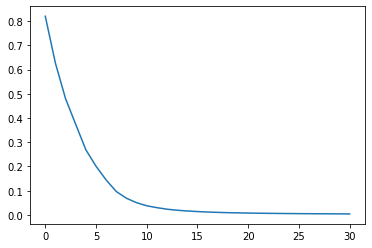

In [17]:
import matplotlib.pyplot as plt
plt.plot(tr_loss_hist)

## Many to One Stacking

hidden layer 여러개

layer를 쌓을 수록 구문론적 의미보다 의미론적 의미를 파악하게 된다.

시퀀스가 너무 길면 학습이 잘 안되는데, NN을 깊게 만드는 것과 같은 이치이다.

In [18]:
# example data
sentences = ['What I cannot create, I do not understand.',
             'Intellecuals solve problems, geniuses prevent them',
             'A person who never made a mistake never tied anything new.',
             'The same equations have the same solutions.']
y_data = [1,0,0,1] # 1: richard feynman, 0: albert einstein

In [19]:
char_set = ['<PAD>'] + sorted(list(set(''.join(sentences))))
idx2char = {idx: char for idx, char in enumerate(char_set)}
char2idx = {char: idx for idx, char in enumerate(char_set)}

In [20]:
x_data = list(map(lambda sentence: [char2idx[char] for char in sentence], sentences))
x_data_len = list(map(len, sentences))

In [21]:
max_sequence = 55
x_data = keras.preprocessing.sequence.pad_sequences(x_data, max_sequence,
                                                    padding='post',
                                                    truncating='post')

In [22]:
num_classes = 2
hidden_dims = [10, 10]

input_dim = len(char2idx)
output_dim = len(char2idx)
one_hot = np.eye(len(char2idx))

In [23]:
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
tr_dataset = tr_dataset.shuffle(4)
tr_dataset = tr_dataset.batch(2)

In [24]:
model = keras.Sequential([
  keras.layers.Embedding(input_dim=input_dim, output_dim=output_dim,
                         trainable=False, mask_zero=True, input_length=max_sequence,
                         embeddings_initializer=keras.initializers.Constant(one_hot)),
  keras.layers.SimpleRNN(hidden_dims[0], return_sequences=True),
  keras.layers.TimeDistributed(keras.layers.Dropout(.2)),
  keras.layers.SimpleRNN(hidden_dims[1]),
  keras.layers.Dropout(.2),
  keras.layers.Dense(num_classes),
  keras.layers.Softmax()
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 55, 30)            900       
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 55, 10)            410       
_________________________________________________________________
time_distributed (TimeDistri (None, 55, 10)            0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
_________________________________________________________________
softmax (Softmax)            (None, 2)                

In [25]:
model.compile(
    keras.optimizers.Adam(0.01),
    keras.losses.sparse_categorical_crossentropy,
    ['acc']
)
history = model.fit(tr_dataset, epochs=30)
history = history.history 

Epoch 1/30
2/2 [==============================] - 0s 16ms/step - loss: 1.0216 - acc: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 0s 13ms/step - loss: 0.5390 - acc: 0.7500
Epoch 3/30
2/2 [==============================] - 0s 16ms/step - loss: 0.5919 - acc: 0.5000
Epoch 4/30
2/2 [==============================] - 0s 12ms/step - loss: 0.4697 - acc: 1.0000
Epoch 5/30
2/2 [==============================] - 0s 13ms/step - loss: 0.3863 - acc: 1.0000
Epoch 6/30
2/2 [==============================] - 0s 20ms/step - loss: 0.2452 - acc: 1.0000
Epoch 7/30
2/2 [==============================] - 0s 13ms/step - loss: 0.2998 - acc: 1.0000
Epoch 8/30
2/2 [==============================] - 0s 13ms/step - loss: 0.0879 - acc: 1.0000
Epoch 9/30
2/2 [==============================] - 0s 13ms/step - loss: 0.0829 - acc: 1.0000
Epoch 10/30
2/2 [==============================] - 0s 13ms/step - loss: 0.0837 - acc: 1.0000
Epoch 11/30
2/2 [==============================] - 0s 13ms/step - loss: 0.1

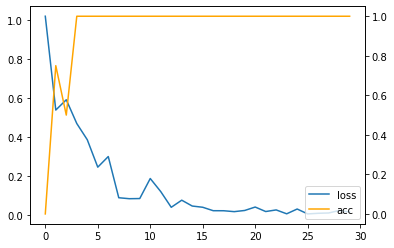

In [26]:
import matplotlib.pyplot as plt

ax1 = plt.axes()
line1 = ax1.plot(history['loss'])

ax2 = ax1.twinx()
line2 = ax2.plot(history['acc'], c='orange')

plt.legend(line1 + line2, ['loss', 'acc'])

> note: "from_logits". 만약에 모델의 출력이 확률이면 이건 normalize 됐다고 보고, from_logits=False를 준다. 하지만 확률이 아니라 [-inf, inf] 범위일 경우 from_logits=True를 준다.

## Many to Many

시퀀스를 구성하고 있는 각각의 토큰이 모두 출력을 가짐

['tensorflow is very easy'] \
['tensorflow' 'is' 'very' 'easy'] \
['noun' 'verb' 'adverb' 'adjective']

각각 토큰이 가지고 있는 loss를 합쳐서 sequence loss를 구한다.

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import numpy as np

In [28]:
sentences = [['I', 'feel', 'hungry'],
     ['tensorflow', 'is', 'very', 'difficult'],
     ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
     ['tensorflow', 'is', 'very', 'fast', 'changing']]
pos = [['pronoun', 'verb', 'adjective'],
     ['noun', 'verb', 'adverb', 'adjective'],
     ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
     ['noun', 'verb', 'adverb', 'adjective', 'verb']]

In [29]:
# 단어 dict

word_list = ['<PAD>'] + sorted(set(sum(sentences, [])))
idx2word = {idx: word for idx, word in enumerate(word_list)}
word2idx = {word: idx for idx, word in enumerate(word_list)}

# 품사 dict

pos_list = ['<PAD>'] + sorted(set(sum(pos, [])))
idx2pos = {idx: pos for idx, pos in enumerate(pos_list)}
pos2idx = {pos: idx for idx, pos in enumerate(pos_list)}

In [30]:
max_sequence = 10
x_data = list(map(lambda sentence: [word2idx[token] for token in sentence], sentences))
y_data = list(map(lambda sentence: [pos2idx[token] for token in sentence], pos))

x_data = pad_sequences(x_data, max_sequence, padding='post')
x_data_mask = ((x_data != 0) * 1).astype(np.float)
x_data_len = list(map(len, sentences))

y_data = pad_sequences(y_data, max_sequence, padding='post')

In [31]:
num_classes = len(pos2idx)
hidden_dim = [10]

input_dim = len(word2idx)
output_dim = len(word2idx)
one_hot = np.eye(len(word2idx))

In [32]:
model = Sequential()
model.add(layers.Embedding(input_dim, output_dim,
                           keras.initializers.Constant(one_hot),
                           mask_zero=True, trainable=False,
                           input_length=max_sequence))
model.add(layers.SimpleRNN(hidden_dim[0], return_sequences=True))
model.add(layers.TimeDistributed(layers.Dense(num_classes)))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 15)            225       
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 10, 10)            260       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 8)             88        
Total params: 573
Trainable params: 348
Non-trainable params: 225
_________________________________________________________________


In [33]:
def loss_fn(model, x, y, x_len, max_sequence):
  masking = tf.sequence_mask(x_len, max_sequence, tf.float32)
  valid_time_step = tf.cast(x_len, tf.float32)
  sequence_loss = tf.losses.sparse_categorical_crossentropy(
      y, model(x), True
  ) * masking
  sequence_loss = tf.reduce_sum(sequence_loss, -1) / valid_time_step
  sequence_loss = tf.reduce_mean(sequence_loss)

  return sequence_loss

In [34]:
lr = 0.1
epochs = 30
batch_size = 2
opt = keras.optimizers.Adam(lr)

In [35]:
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data, x_data_len))
tr_dataset = tr_dataset.shuffle(4)
tr_dataset = tr_dataset.batch(batch_size)

In [36]:
tr_loss_hist = []

for epoch in range(epochs+1):
  avg_tr_loss = 0
  tr_step = 0
    
  for x_mb, y_mb, x_mb_len in tr_dataset:
    with tf.GradientTape() as tape:
      tr_loss = loss_fn(model, x=x_mb, y=y_mb, x_len=x_mb_len, max_sequence=max_sequence)
    grads = tape.gradient(target=tr_loss, sources=model.variables)
    opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
    avg_tr_loss += tr_loss
    tr_step += 1
  else:
    avg_tr_loss /= tr_step
    tr_loss_hist.append(avg_tr_loss)

  if epoch % 5 == 0:
    print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch, avg_tr_loss))

epoch :   0, tr_loss : 2.081
epoch :   5, tr_loss : 0.082
epoch :  10, tr_loss : 0.007
epoch :  15, tr_loss : 0.002
epoch :  20, tr_loss : 0.001
epoch :  25, tr_loss : 0.001
epoch :  30, tr_loss : 0.001


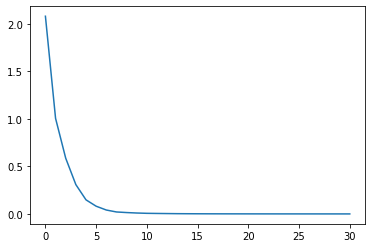

In [37]:
plt.plot(tr_loss_hist)

## Many to Many bidirectional

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np

In [39]:
sentences = [['I', 'feel', 'hungry'],
     ['tensorflow', 'is', 'very', 'difficult'],
     ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
     ['tensorflow', 'is', 'very', 'fast', 'changing']]
pos = [['pronoun', 'verb', 'adjective'],
     ['noun', 'verb', 'adverb', 'adjective'],
     ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
     ['noun', 'verb', 'adverb', 'adjective', 'verb']]

In [40]:
# 단어 dict

word_list = ['<PAD>'] + sorted(set(sum(sentences, [])))
idx2word = {idx: word for idx, word in enumerate(word_list)}
word2idx = {word: idx for idx, word in enumerate(word_list)}

# 품사 dict

pos_list = ['<PAD>'] + sorted(set(sum(pos, [])))
idx2pos = {idx: pos for idx, pos in enumerate(pos_list)}
pos2idx = {pos: idx for idx, pos in enumerate(pos_list)}

In [41]:
max_sequence = 10
x_data = list(map(lambda sentence: [word2idx[token] for token in sentence], sentences))
y_data = list(map(lambda sentence: [pos2idx[token] for token in sentence], pos))

x_data = pad_sequences(x_data, max_sequence, padding='post')
x_data_mask = ((x_data != 0) * 1).astype(np.float)
x_data_len = list(map(len, sentences))

y_data = pad_sequences(y_data, max_sequence, padding='post')

In [42]:
num_classes = len(pos2idx)
hidden_dim = [10]

input_dim = len(word2idx)
output_dim = len(word2idx)
one_hot = np.eye(len(word2idx))

In [48]:
input_tensor = layers.Input((max_sequence,))
embeded = layers.Embedding(input_dim, output_dim,
                           keras.initializers.Constant(one_hot),
                           mask_zero=True, trainable=False,
                           input_length=max_sequence)(input_tensor)

last = layers.Bidirectional(
    layers.SimpleRNN(hidden_dim[0], return_sequences=True)
)(embeded)
output = layers.TimeDistributed(layers.Dense(num_classes))(last)
valid_time_step = K.sum(K.cast(output._keras_mask, tf.float32), -1)
output = K.sum(output, -1)
model = Model(input_tensor, output)

model.compile(
    keras.optimizers.Adam(0.1),
    keras.losses.mae,
    ['acc']
)

model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 10, 15)            225       
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 20)            520       
_________________________________________________________________
time_distributed_4 (TimeDist (None, 10, 8)             168       
_________________________________________________________________
tf_op_layer_Sum_5 (TensorFlo [(None, 10)]              0         
Total params: 913
Trainable params: 688
Non-trainable params: 225
_________________________________________________________________


In [44]:
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
tr_dataset = tr_dataset.shuffle(4)
tr_dataset = tr_dataset.batch(2)

In [49]:
(history) = model.fit(tr_dataset, epochs=30)

Epoch 1/30
2/2 [==============================] - 0s 6ms/step - loss: 1.7128 - acc: 0.2500
Epoch 2/30
2/2 [==============================] - 0s 4ms/step - loss: 1.6714 - acc: 1.0000
Epoch 3/30
2/2 [==============================] - 0s 4ms/step - loss: 1.4658 - acc: 0.7500
Epoch 4/30
2/2 [==============================] - 0s 4ms/step - loss: 1.4807 - acc: 0.7500
Epoch 5/30
2/2 [==============================] - 0s 4ms/step - loss: 1.4150 - acc: 0.7500
Epoch 6/30
2/2 [==============================] - 0s 4ms/step - loss: 0.9571 - acc: 0.5000
Epoch 7/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8341 - acc: 0.2500
Epoch 8/30
2/2 [==============================] - 0s 4ms/step - loss: 1.2994 - acc: 0.7500
Epoch 9/30
2/2 [==============================] - 0s 4ms/step - loss: 1.0393 - acc: 0.7500
Epoch 10/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7033 - acc: 1.0000
Epoch 11/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7558 - acc: 1.00

완벽하지 않아보인다.. 원래 valid time step 으로 마지막에 reduce_sum을 하고 나눠야하는데, 어떻게 하는지 모르겠다.

## Seq2Seq

Seq2Seq는 다른 RNN과는 달리 시퀀스의 입력이 모두 끝나고, 결과가 나오게 된다.

인코더와 디코더로 나뉜다.